In [4]:
!touch 0-initialize.py
!chmod +x *.py

In [7]:
import scipy
import sklearn

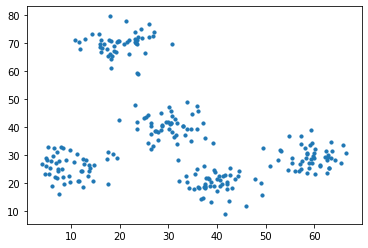

[[14.54730144 13.46780434]
 [20.57098466 33.55245039]
 [ 9.55556506 51.51143281]
 [48.72458008 20.03154959]
 [25.43826106 60.35542243]]


In [1]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
""" initialize cluster centroids for K-means """

import numpy as np


def initialize(X, k):
    """ doc """
    try:
        n, d = X.shape
        return np.random.uniform(np.amin(X, axis=0),
                                 np.amax(X, axis=0),
                                 size=(k, d))
    except Exception:
        return None

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    plt.scatter(X[:, 0], X[:, 1], s=10)
    plt.show()
    print(initialize(X, 5))